In [ ]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
# 폰트 관련 용도
# import matplotlib.font_manager as fm
import cv2

import torch
from torch import nn, optim
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader
from torchvision.io import read_image
from torchvision import models, datasets, transforms
# from torchinfo import summary

# 기본 폰트 설정
# plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
import os
import cv2

import torch
from torch import nn, optim
from torchvision import models, datasets, transforms
from torchvision.io import read_image
import torchvision.transforms.functional as F

import time

In [ ]:
## Faster R-CNN object detection
dir(models.detection)

['FCOS',
 'FCOS_ResNet50_FPN_Weights',
 'FasterRCNN',
 'FasterRCNN_MobileNet_V3_Large_320_FPN_Weights',
 'FasterRCNN_MobileNet_V3_Large_FPN_Weights',
 'FasterRCNN_ResNet50_FPN_V2_Weights',
 'FasterRCNN_ResNet50_FPN_Weights',
 'KeypointRCNN',
 'KeypointRCNN_ResNet50_FPN_Weights',
 'MaskRCNN',
 'MaskRCNN_ResNet50_FPN_V2_Weights',
 'MaskRCNN_ResNet50_FPN_Weights',
 'RetinaNet',
 'RetinaNet_ResNet50_FPN_V2_Weights',
 'RetinaNet_ResNet50_FPN_Weights',
 'SSD300_VGG16_Weights',
 'SSDLite320_MobileNet_V3_Large_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'anchor_utils',
 'backbone_utils',
 'faster_rcnn',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcos',
 'fcos_resnet50_fpn',
 'generalized_rcnn',
 'image_list',
 'keypoint_rcnn',
 'keypointrcnn_resnet50_fpn',
 'mask_rcnn',
 'maskrcnn_resnet50_fpn'

In [ ]:
weights = models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1
fasterRCNN = models.detection.fasterrcnn_resnet50_fpn(weights=weights)

print(fasterRCNN)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 213MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
fasterRCNN = fasterRCNN.to(device)
fasterRCNN.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
## read image
data_dir = './figure'
img_path = os.path.join(data_dir, 'peoples.jpg')
# print(img_path)
img = read_image(img_path).to(device)

print(img.shape)

torch.Size([3, 576, 768])


In [ ]:
## preprocessing

preprocess = weights.transforms()
img = preprocess(img).unsqueeze(0)
img.shape

torch.Size([1, 3, 576, 768])

In [ ]:
## time

import time

start = time.time()
pred = fasterRCNN(img)
stop = time.time()

print(f'estimation time = {(stop - start)*1000:.4f}ms')

estimation time = 44.1685ms


In [ ]:
pred[0].keys()
pred[0]['scores']

tensor([0.9997, 0.9990, 0.9984, 0.9827, 0.9624, 0.9608, 0.9538, 0.7644, 0.6885,
        0.6878, 0.6709, 0.6214, 0.6178, 0.5643, 0.5434, 0.4994, 0.4922, 0.4699,
        0.4679, 0.4592, 0.3175, 0.3054, 0.2865, 0.2655, 0.2652, 0.2330, 0.2313,
        0.2186, 0.2114, 0.2074, 0.1976, 0.1773, 0.1637, 0.1527, 0.1469, 0.1438,
        0.1357, 0.1274, 0.1250, 0.1243, 0.1173, 0.1133, 0.1099, 0.1065, 0.1052,
        0.0946, 0.0827, 0.0774, 0.0744, 0.0689, 0.0667, 0.0637, 0.0617, 0.0616,
        0.0613, 0.0602, 0.0597, 0.0593, 0.0584, 0.0575, 0.0555, 0.0548, 0.0538,
        0.0504], device='cuda:0', grad_fn=<IndexBackward0>)

In [ ]:
threshold = 0.8
indices = pred[0]["scores"] >= threshold

pred_boxes = pred[0]["boxes"][indices]
pred_labels = pred[0]["labels"][indices]
pred_scores = pred[0]["scores"][indices]

print(pred_scores)
print(pred_labels)

tensor([0.9997, 0.9990, 0.9984, 0.9827, 0.9624, 0.9608, 0.9538],
       device='cuda:0', grad_fn=<IndexBackward0>)
tensor([ 1,  1,  1,  8,  3, 77,  3], device='cuda:0')


In [ ]:
coco_labels = weights.meta['categories']

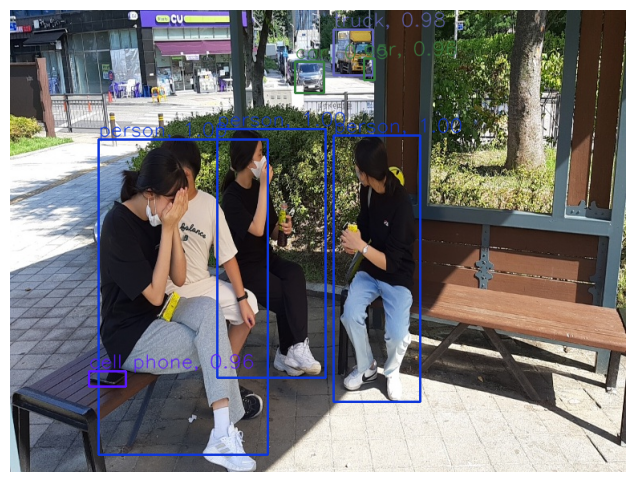

In [ ]:
import random

image = img[0].permute(1, 2, 0).cpu().numpy() # 0 ~ 1
image = (image * 255).astype(np.uint8)        # 리스케일링
# image = np.clip(image, 0, 255).astype(np.uint8)
color_array = [[random.randint(0, 255) for _ in range(3)] for _ in range(91)]

for i in range(len(pred_scores)):
  x_min = int(pred_boxes[i][0])
  y_min = int(pred_boxes[i][1])
  x_max = int(pred_boxes[i][2])
  y_max = int(pred_boxes[i][3])

  color = color_array[pred_labels[i]]
  cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
  text = f"{coco_labels[pred_labels[i]]}, {pred_scores[i]:.2f}"
  cv2.putText(image, text, (x_min, y_min-4),
              0, 0.8, color, 1, cv2.LINE_AA)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
weights = models.segmentation.FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1
models = models.segmentation.fcn_resnet50(weights=weights)

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|██████████| 135M/135M [00:00<00:00, 222MB/s]


In [ ]:
img1 = read_image(os.path.join(data_dir, "peoples.jpg"))
img2 = read_image(os.path.join(data_dir, "dog.jpg"))

img_list = [img1, img2]

In [ ]:
import torchvision.transforms.functional as F

def show(imgs:list):
  fig, axs = plt.subplots(ncols=len(imgs), figsize=(10,4), squeeze=False)

  for i, img in enumerate(imgs):
    img = F.to_pil_image(img)
    axs[0, i].imshow(img)
    axs[0, i].axis("off")

  plt.show()

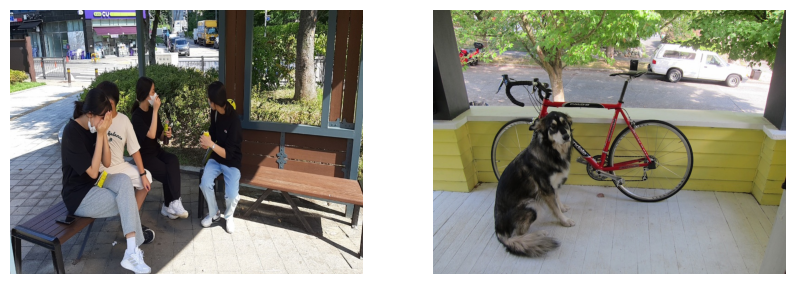

In [ ]:
show(img_list)

In [ ]:
transform = weights.transforms(resize_size=None)

In [ ]:
batch = torch.stack([transform(i).to(device) for i in img_list])
batch.shape

torch.Size([2, 3, 576, 768])

In [ ]:
models = models.to(device)
models.eval()
start = time.time()
output = models(batch)
stop = time.time()

print(f"estimation time = {(stop-start)*1000:.3f}ms")

estimation time = 9.194ms


In [ ]:
output['out'].shape

torch.Size([2, 21, 576, 768])

In [ ]:
sem_class_to_idx = {cls:idx for idx, cls in enumerate(weights.meta['categories'])}
sem_class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

In [ ]:
output = output['out']
print(output.shape)

torch.Size([2, 21, 576, 768])


In [ ]:
normalized_masks = torch.softmax(output, dim=1)

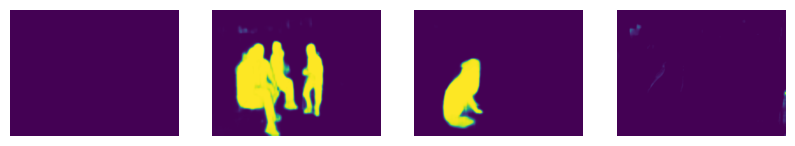

In [ ]:
result_mask = [
    normalized_masks[img_idx, sem_class_to_idx[cls]]
    for img_idx in range(len(img_list)) for cls in ('dog', 'person')
]

show(result_mask)

# SSD (Single shot multibox detector)

In [ ]:
dir(models.detection)

['FCOS',
 'FCOS_ResNet50_FPN_Weights',
 'FasterRCNN',
 'FasterRCNN_MobileNet_V3_Large_320_FPN_Weights',
 'FasterRCNN_MobileNet_V3_Large_FPN_Weights',
 'FasterRCNN_ResNet50_FPN_V2_Weights',
 'FasterRCNN_ResNet50_FPN_Weights',
 'KeypointRCNN',
 'KeypointRCNN_ResNet50_FPN_Weights',
 'MaskRCNN',
 'MaskRCNN_ResNet50_FPN_V2_Weights',
 'MaskRCNN_ResNet50_FPN_Weights',
 'RetinaNet',
 'RetinaNet_ResNet50_FPN_V2_Weights',
 'RetinaNet_ResNet50_FPN_Weights',
 'SSD300_VGG16_Weights',
 'SSDLite320_MobileNet_V3_Large_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'anchor_utils',
 'backbone_utils',
 'faster_rcnn',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcos',
 'fcos_resnet50_fpn',
 'generalized_rcnn',
 'image_list',
 'keypoint_rcnn',
 'keypointrcnn_resnet50_fpn',
 'mask_rcnn',
 'maskrcnn_resnet50_fpn'

In [ ]:
weights = models.detection.SSD300_VGG16_Weights.COCO_V1
ssd300 = models.detection.ssd300_vgg16(weights=weights).to(device)
ssd300

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
!pip install torchinfo
from torchinfo import summary

In [ ]:
summary(ssd300, (1, 3, 300, 300))

Layer (type:depth-idx)                   Output Shape              Param #
SSD                                      [90, 4]                   --
├─GeneralizedRCNNTransform: 1-1          [1, 3, 300, 300]          --
├─SSDFeatureExtractorVGG: 1-2            [1, 256, 1, 1]            512
│    └─Sequential: 2-1                   [1, 512, 38, 38]          --
│    │    └─Conv2d: 3-1                  [1, 64, 300, 300]         (1,792)
│    │    └─ReLU: 3-2                    [1, 64, 300, 300]         --
│    │    └─Conv2d: 3-3                  [1, 64, 300, 300]         (36,928)
│    │    └─ReLU: 3-4                    [1, 64, 300, 300]         --
│    │    └─MaxPool2d: 3-5               [1, 64, 150, 150]         --
│    │    └─Conv2d: 3-6                  [1, 128, 150, 150]        73,856
│    │    └─ReLU: 3-7                    [1, 128, 150, 150]        --
│    │    └─Conv2d: 3-8                  [1, 128, 150, 150]        147,584
│    │    └─ReLU: 3-9                    [1, 128, 150, 150]     

In [ ]:
preprocess = weights.transforms()
print(preprocess)

ObjectDetection()


In [ ]:
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor()
])

In [ ]:
dataset = datasets.VOCDetection(
    root = "data",
    year = "2012",
    image_set = "val",
    download=True,
    transform=transform
)

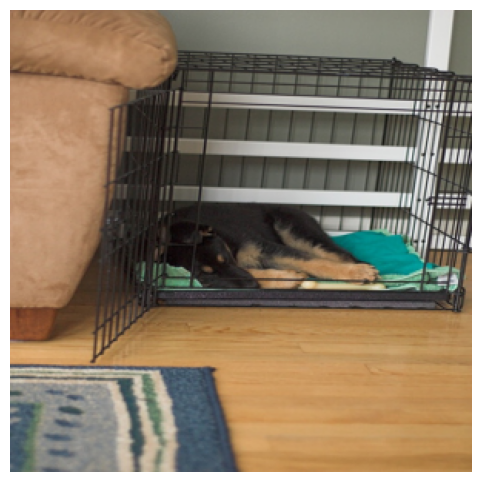

In [ ]:
idx = torch.randint(len(dataset), size=(1,))
image, annotation = dataset[idx]

plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.show()

In [ ]:
idx = torch.randint(len(dataset), size=(1,))
image_jpg, annotation = dataset[idx] # (3, 300, 300), tensor

image = image_jpg.unsqueeze(0).to(device)
ssd300 = ssd300.to(device)
ssd300.eval()

start = time.time()
with torch.no_grad():
  prediction = ssd300(image)
stop = time.time()

print(f"estimation time = {(stop-start)*1000:.3f}ms")

estimation time = 28.641ms


In [ ]:
image = image.cpu()[0]
image = F.to_pil_image(image)
image = np.array(image)

In [ ]:
# prediction[0].keys()

image.shape

(300, 300, 3)

In [ ]:
import time

idx = torch.randint(len(dataset), size = (1, ))
image_jpg, annotation = dataset[idx.item()]
image = image_jpg.unsqueeze(0).to(device)

ssd300.eval()
start = time.time()
with torch.no_grad():
    prediction = ssd300(image)
stop = time.time()
print(f"estimation time = {(stop - start)*1000:.3f}ms")
prediction = prediction[0] # batch remove
# prediction

estimation time = 27.283ms


In [ ]:
image = image.cpu().data[0]
image = transforms.functional.to_pil_image(image)
image = np.array(image)

[35, 82, 268, 257]


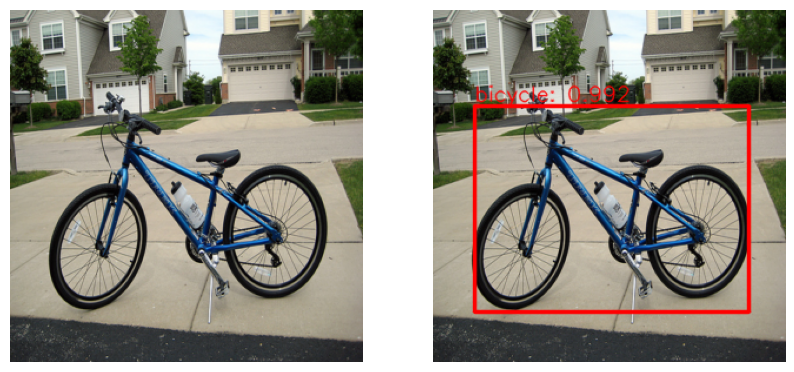

In [ ]:

threshold=0.5

for box, label, score in zip(prediction["boxes"], prediction["labels"], prediction["scores"]):
    if score > threshold:
        box = list(map(int, box))
        print(box)
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2, cv2.LINE_AA)
        text = f"{weights.meta['categories'][label.item()]}: {score.item():.3f}"
        cv2.putText(image, text, (box[0], box[1] - 4), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1, cv2.LINE_AA)
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].imshow(image_jpg.permute(1, 2, 0))
axs[0].grid(None)
axs[0].axis("off")
axs[1].imshow(image)
axs[1].grid(None)
axs[1].axis("off")
plt.show()


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
from ultralytics import YOLO

In [ ]:
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

estimation time = 553.3614158630371ms
FPS = 1.8071372006311164


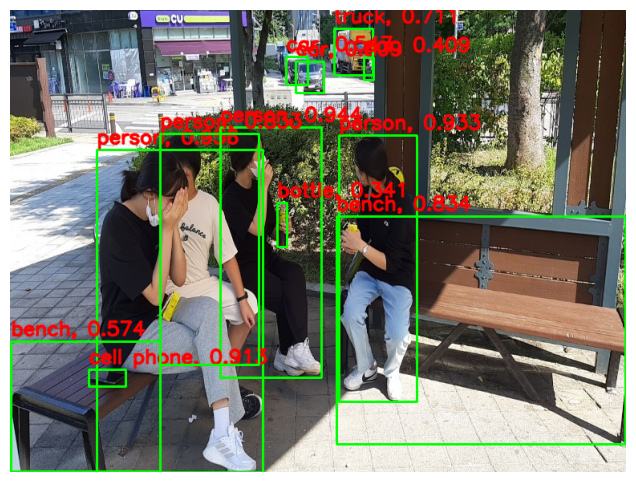

In [ ]:
img_path = os.path.join('./figure', 'peoples.jpg')
img = cv2.imread(img_path)
if img is None:
  print("Image read failed")

model = YOLO('yolov10x.pt')

start = time.time()
detection = model(img, verbose=False)
stop = time.time()

on_time = (stop-start)*1000
fps = 1/on_time

print(f"estimation time = {on_time}ms")
print(f"FPS = {fps*1000}")

threshold = 0.2

for data in detection[0].boxes.data.tolist():
  confidence = data[4]
  if confidence < threshold:
    continue

  x_min, y_min, x_max, y_max = int(data[0]), int(data[1]),int(data[2]), int(data[3])
  label =int(data[5])

  cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
  text = f'{detection[0].names[label]}, {confidence:.3f}'
  cv2.putText(img, text, (x_min, y_min-8), 0, 0.8, (0, 0, 255), 2, cv2.LINE_AA)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

# Face detection

In [ ]:
img = cv2.imread('./figure/king_face.png')

if img is None:
  print('image read failed')

## model import
model = '/content/opencv_face_detector_uint8.pb'
config = '/content/opencv_face_detector.pbtxt'

face_net = cv2.dnn.readNet(model, config)
if face_net.empty():
  print('Net load failed')

blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123), swapRB=False)
face_net.setInput(blob)
out = face_net.forward()

In [ ]:
import pandas as pd
labels = ["img_id", 'is_face', 'confidence', 'x_min', 'y_min', 'x_max', 'y_max']
out_df = pd.DataFrame(out[0][0], columns=labels)
out_df

,img_id,is_face,confidence,x_min,y_min,x_max,y_max
0,0.0,1.0,0.989431,0.825202,0.502988,0.893821,0.658601
1,0.0,1.0,0.950553,0.147596,0.511079,0.215222,0.681570
2,0.0,1.0,0.947276,0.288199,0.444965,0.359195,0.628823
3,0.0,1.0,0.920968,0.499137,0.392986,0.589955,0.570557
4,0.0,1.0,0.835135,0.642767,0.463616,0.720524,0.659535
...,...,...,...,...,...,...,...
195,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
196,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
197,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
198,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


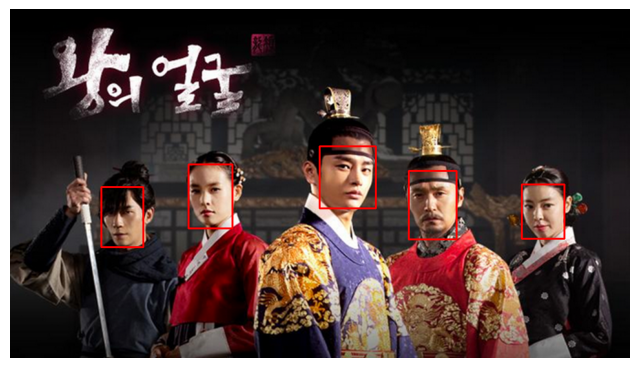

In [ ]:
detect = out[0, 0]
h, w = img.shape[:2]

for i in range(len(detect)):
  confidence = detect[i, 2]

  if confidence > 0.5:
    x1 = int(detect[i, 3] * w)
    y1 = int(detect[i, 4] * h)
    x2 = int(detect[i, 5] * w)
    y2 = int(detect[i, 6] * h)

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")
plt.show()